In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv('dataset/X_train.csv').set_index('DELIVERY_START')
X_train.index = pd.to_datetime(X_train.index, utc=True).tz_convert(None)
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2022-01-01 01:00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
2022-01-01 02:00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2022-01-01 03:00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
2022-01-01 04:00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
2022-01-01 05:00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [3]:
y_train = pd.read_csv('dataset/y_train.csv').set_index('DELIVERY_START')
y_train.index = pd.to_datetime(y_train.index, utc=True).tz_convert(None)
y_train.head()

,spot_id_delta
DELIVERY_START,
2022-01-01 01:00:00,-36.874770
2022-01-01 02:00:00,-12.643588
2022-01-01 03:00:00,-1.950193
2022-01-01 04:00:00,1.938272
2022-01-01 05:00:00,0.199907


<Axes: xlabel='DELIVERY_START'>

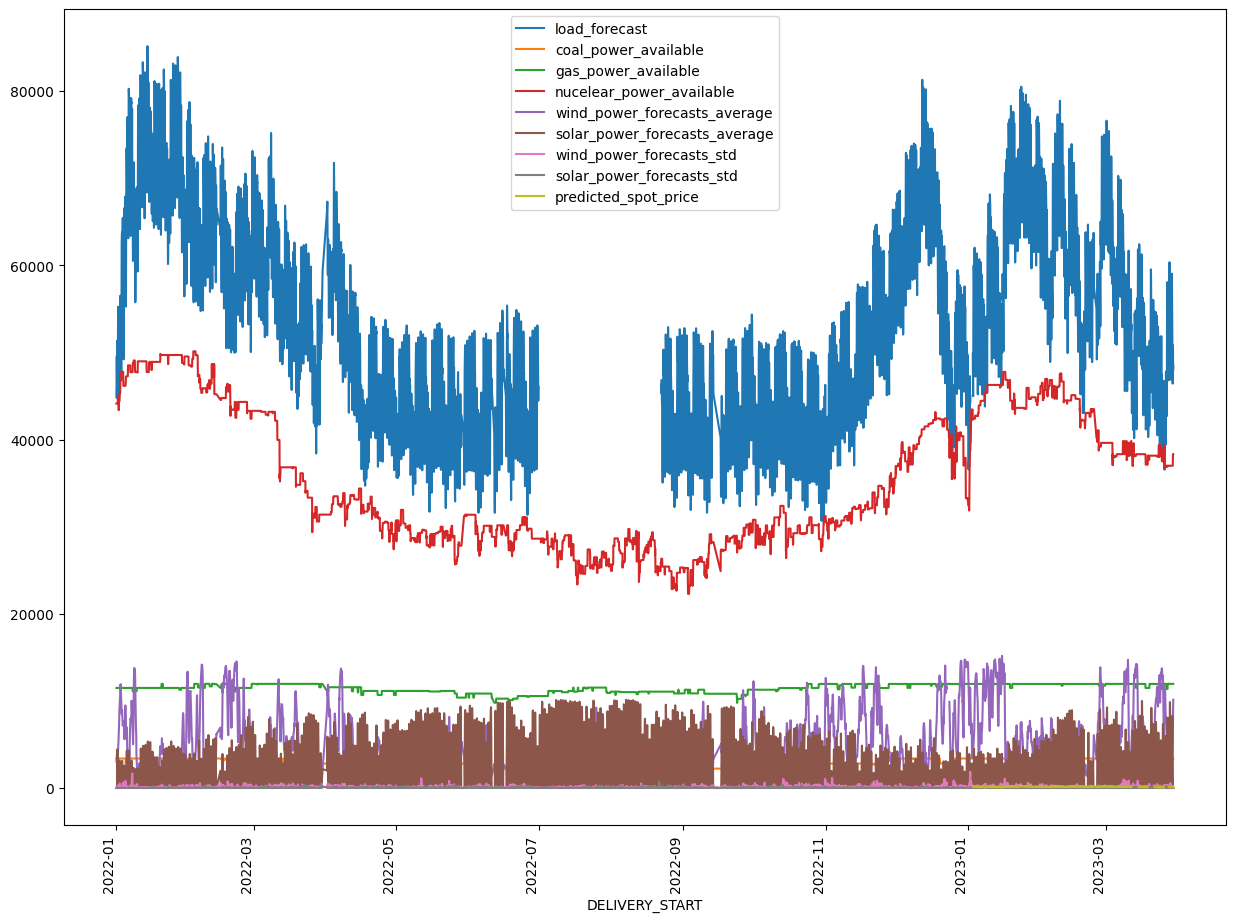

In [4]:
X_train.plot(figsize=(15,12), rot=90)

array([[<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>, <Axes: xlabel='DELIVERY_START'>,
        <Axes: xlabel='DELIVERY_START'>]], dtype=object)

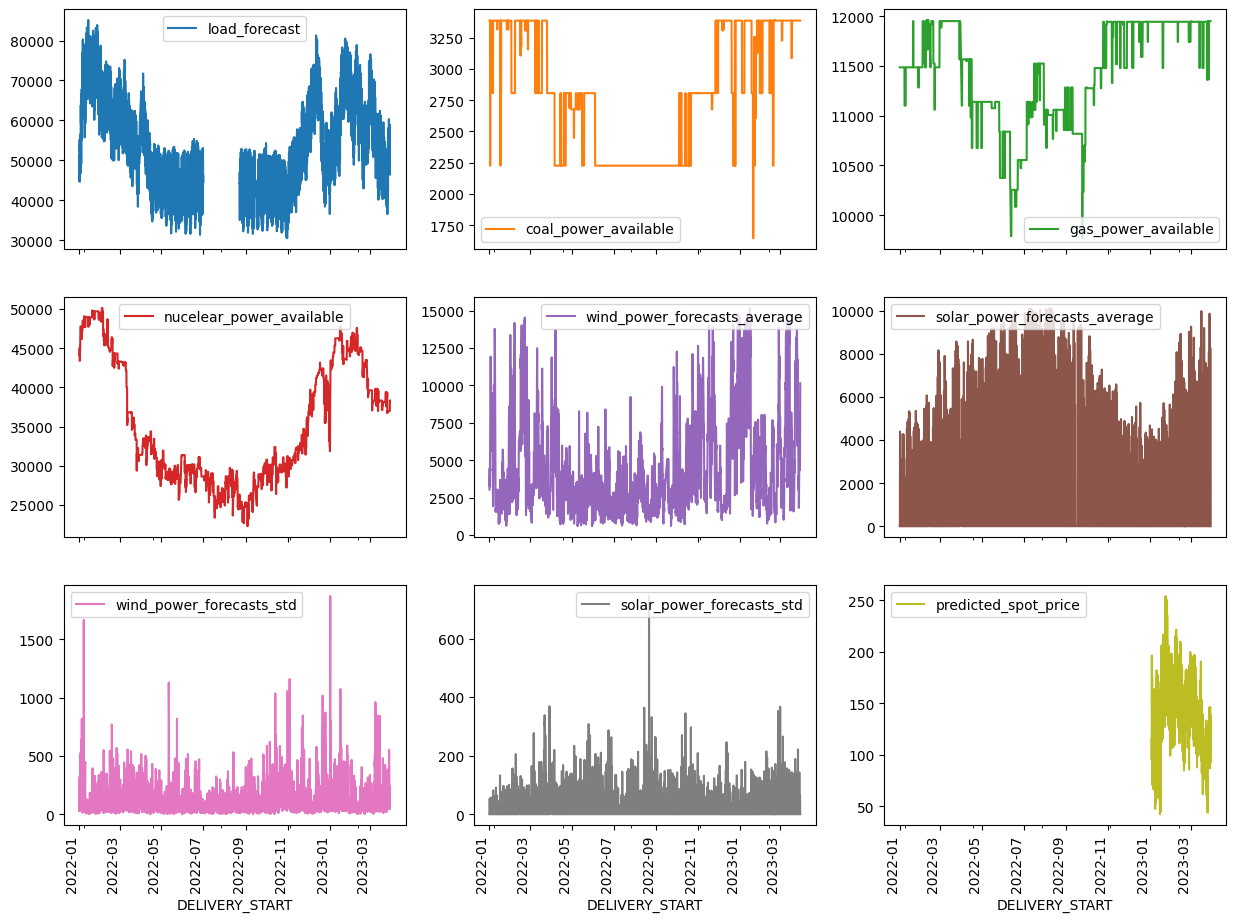

In [5]:
X_train.plot(subplots=True, layout=(3,3), figsize=(15,12), rot=90)

array([[<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>],
       [<Axes: xlabel='DELIVERY_START'>]], dtype=object)

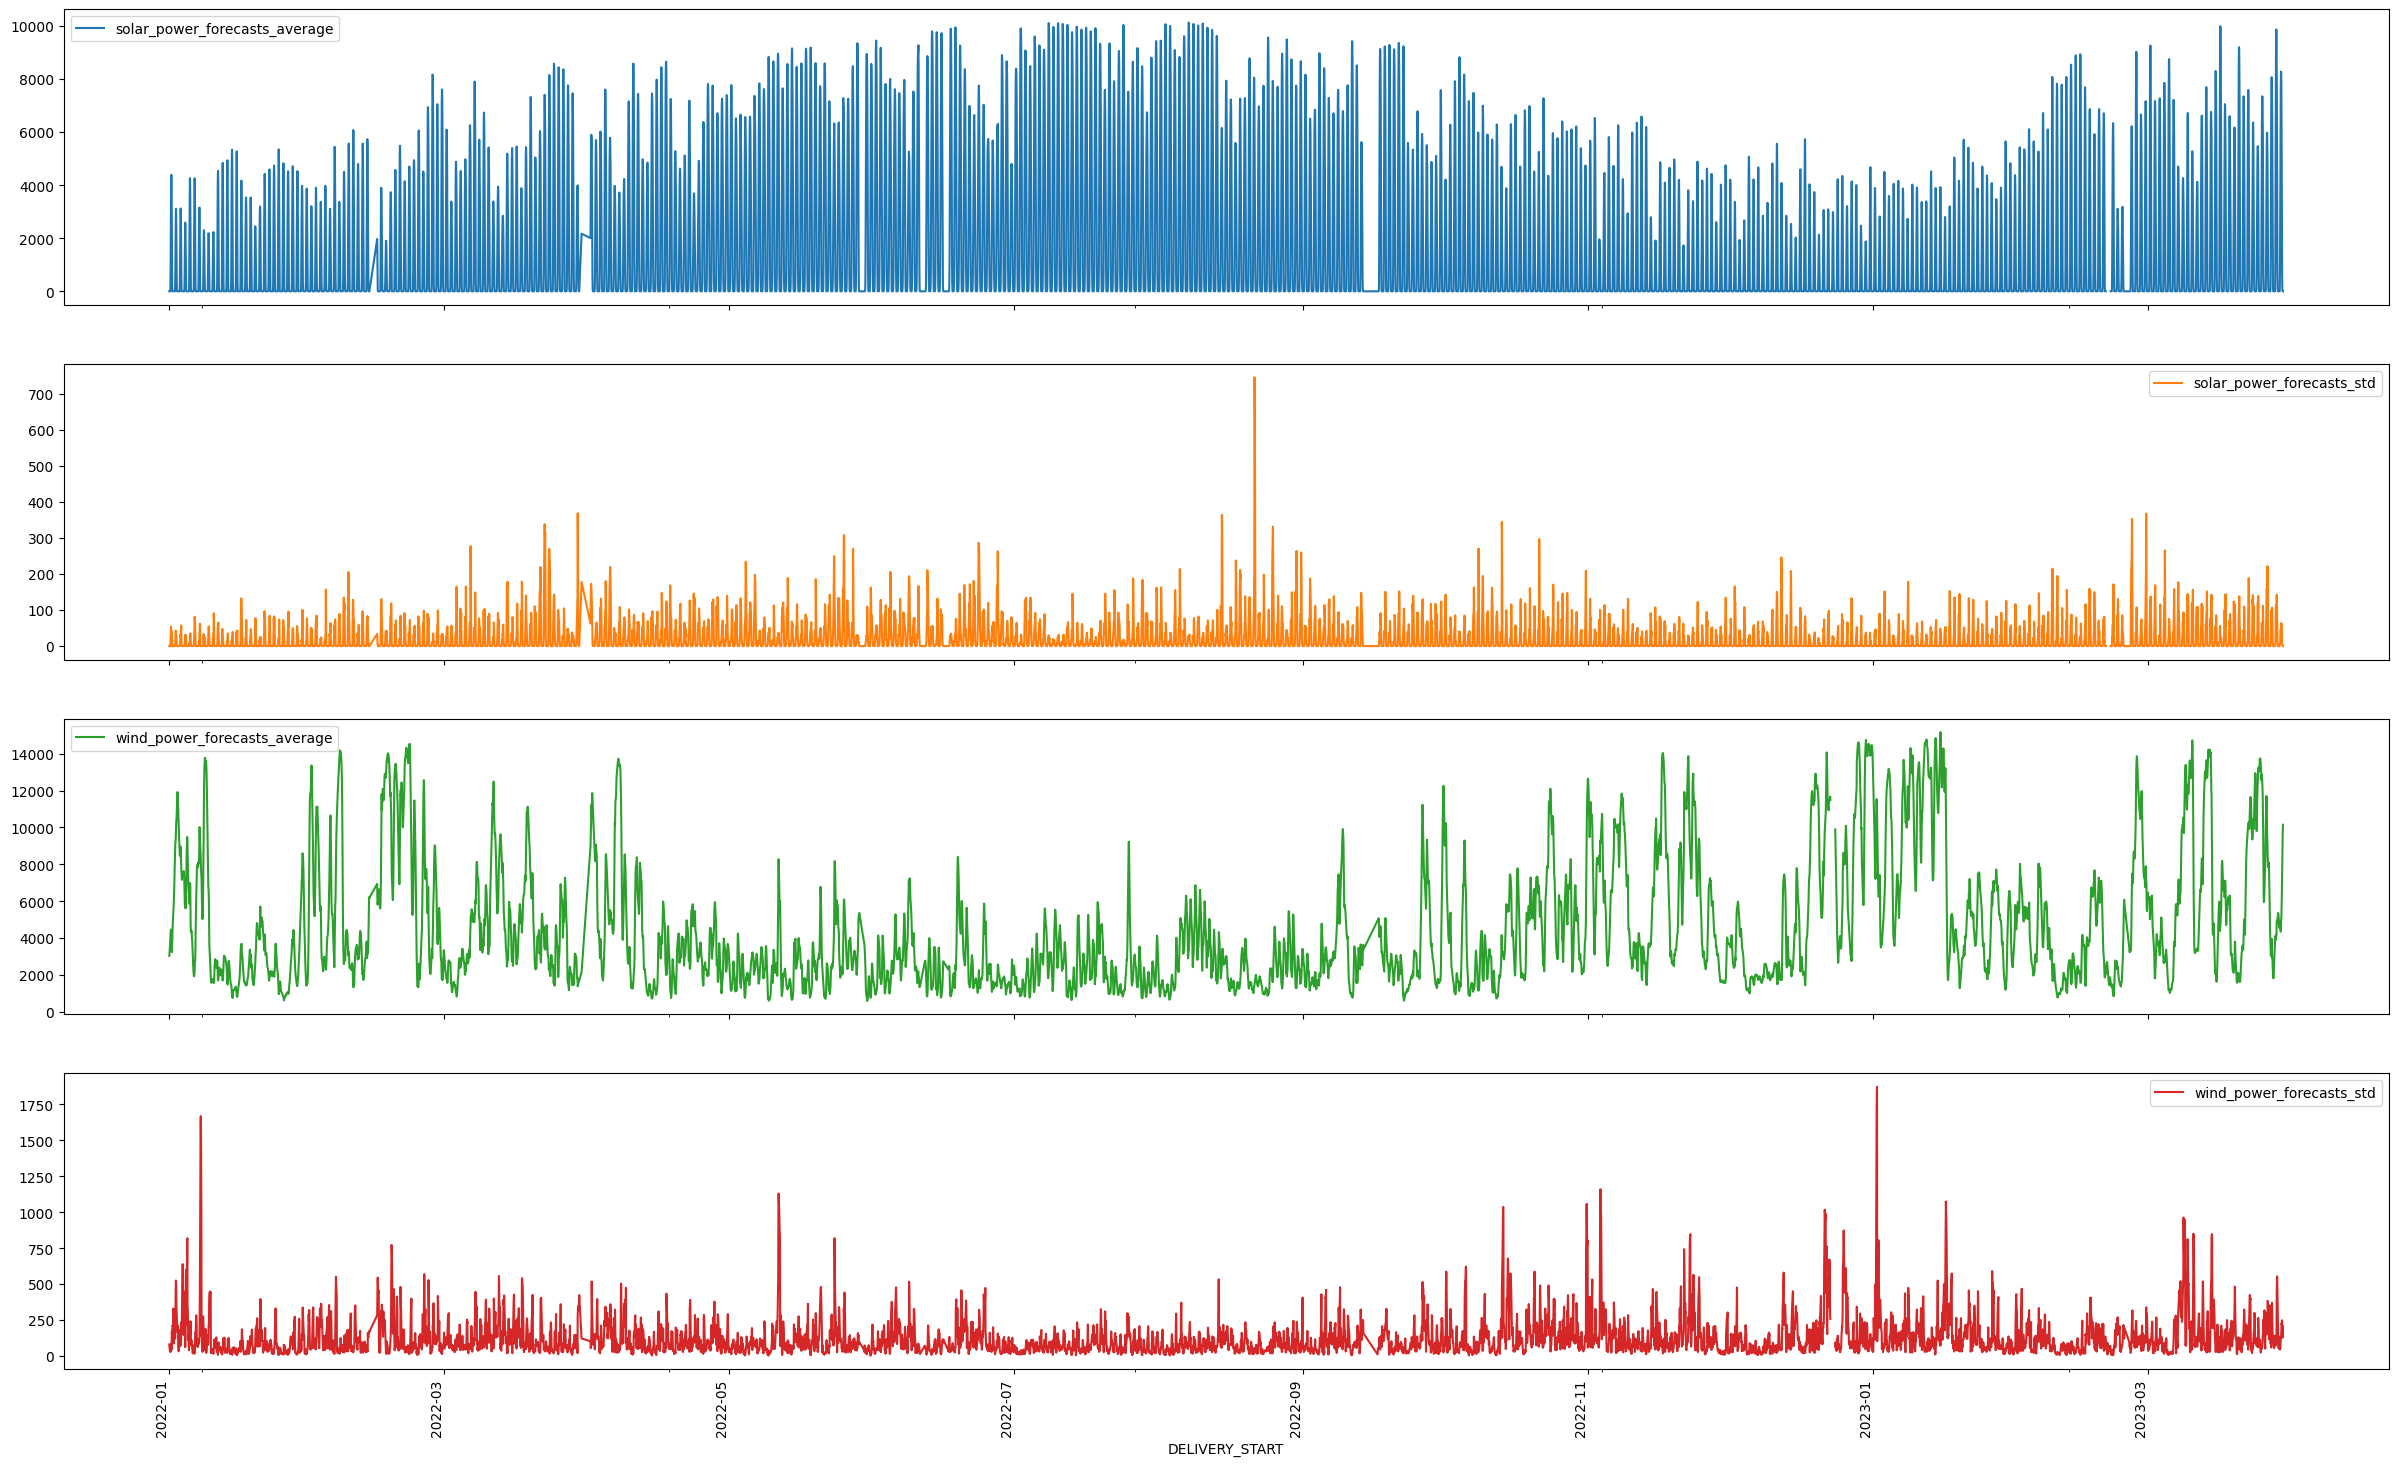

In [6]:
X_train[['solar_power_forecasts_average', 'solar_power_forecasts_std', 'wind_power_forecasts_average', 'wind_power_forecasts_std']].plot(subplots=True, layout=(4,1), sharex=True, figsize=(30,20), rot=90)

<Axes: xlabel='DELIVERY_START'>

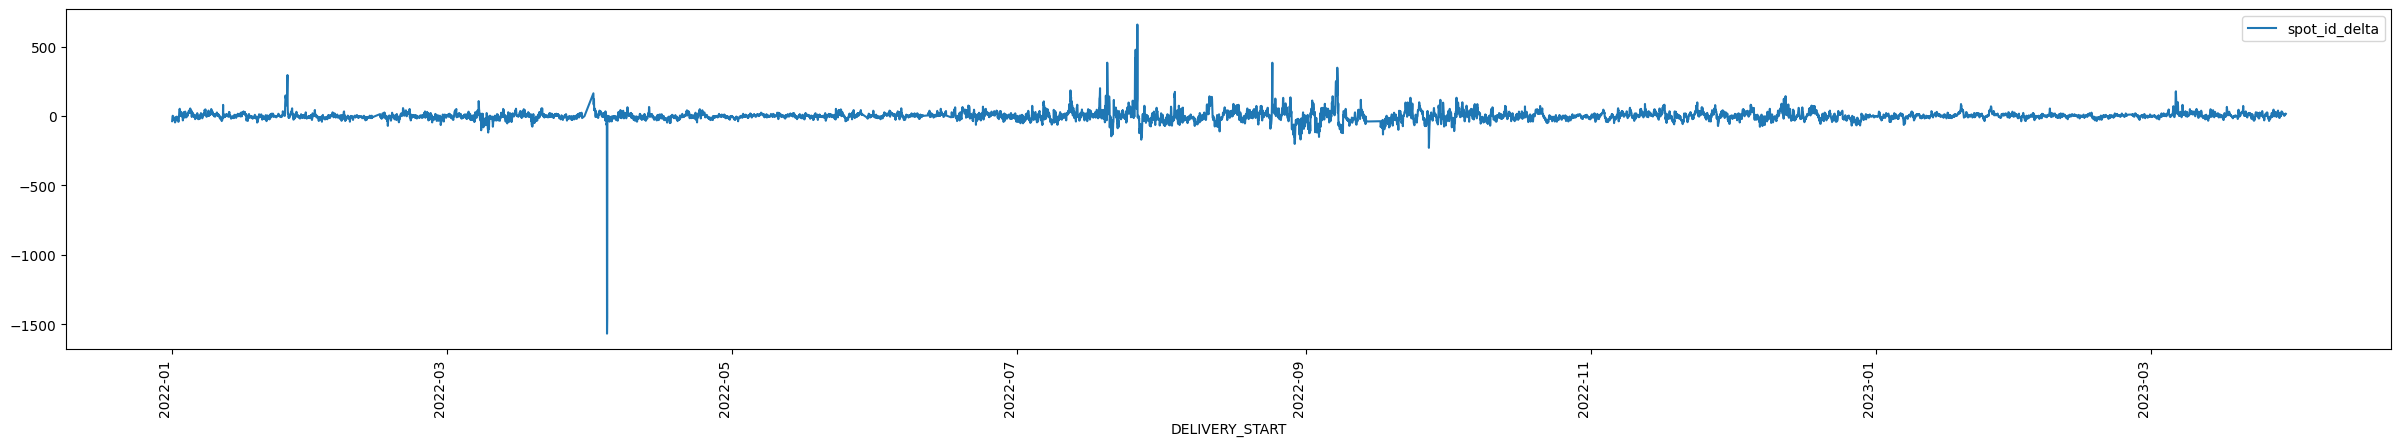

In [7]:
y_train.plot(figsize=(30,5), rot=90)

Observations:
- load_forecast feature has missing data, high correlation with nucelear_power_available, clear seasonality
- predicted_spot_price has a lot of missing values
- question: is there seasonality in solar_power_forecasts_average and solar_power_forecasts_std?
- y_train has an outlier value

Test for daily/weekly/monthly seasonality

In [8]:
X_train.index = pd.to_datetime(X_train.index, utc=True)

In [9]:
X_train['month'] = X_train.index.month
X_train['day'] = X_train.index.day_of_week